In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

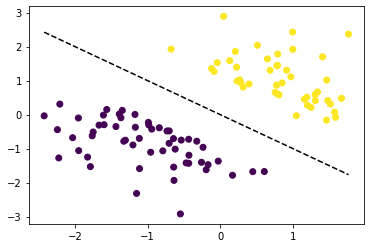

In [21]:
from custom_qiskit_v3_2.classifier import BinarySVM, Kernel
from custom_qiskit_v3_2.datageneration import Toy2DLinearLoader

dl = Toy2DLinearLoader((1,1), -0)
X, y = dl(100)
dl.plot(X, y)

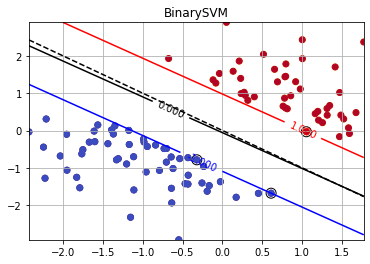

In [22]:
from matplotlib import pyplot as plt 
svm = BinarySVM(Kernel('linear'), C=None, mutation='REDUCED_SVM')
svm.fit(X, y)
ax = plt.subplot()
dl.plot(X, y)
svm.plot('sv', axes=ax, colors=None, levels=None)
svm.plot_boundary(ax)

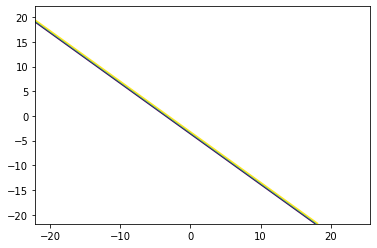

In [4]:
import numpy as np
xx = np.linspace(min(X[:,0]), max(X[:,0]), 100)
yy = np.linspace(min(X[:,1]), max(X[:,1]), 10)
XX, YY = np.meshgrid(xx, yy)
ZZ = np.empty_like(XX)
for i in range(len(xx)):
    for j in range(len(yy)):
        ZZ[j, i] = svm.f(np.array([XX[j,i], YY[j,i]]))
from matplotlib import pyplot as plt 
plt.contour(XX, YY, ZZ, 'k', levels=(-1,0,1), inline=1)

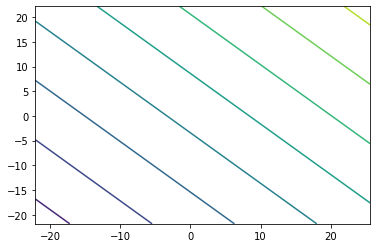

In [5]:
import numpy as np
xx = np.linspace(min(X[:,0]), max(X[:,0]), 100)
yy = np.linspace(min(X[:,1]), max(X[:,1]), 10)
XX, YY = np.meshgrid(xx, yy)
xxx = XX.flatten()
yyy = YY.flatten()
ZZ = svm.f(np.vstack((xxx,yyy)).T).reshape(XX.shape)
from matplotlib import pyplot as plt 
plt.contour(XX, YY, ZZ)